In [1]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [8]:
bc.target[0]

np.int64(0)

In [6]:
bc.target.shape

(569,)

In [7]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
bc.data.shape

(569, 30)

# Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [11]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Lable=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Lable=> train: (455,) - test: (114,)


# Normalize

In [12]:
x_train[0]

array([1.882e+01, 2.197e+01, 1.237e+02, 1.110e+03, 1.018e-01, 1.389e-01,
       1.594e-01, 8.744e-02, 1.943e-01, 6.132e-02, 8.191e-01, 1.931e+00,
       4.493e+00, 1.039e+02, 8.074e-03, 4.088e-02, 5.321e-02, 1.834e-02,
       2.383e-02, 4.515e-03, 2.266e+01, 3.093e+01, 1.453e+02, 1.603e+03,
       1.390e-01, 3.463e-01, 3.912e-01, 1.708e-01, 3.007e-01, 8.314e-02])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train[0]

array([0.56031994, 0.4146094 , 0.55220786, 0.40996819, 0.44389275,
       0.40928704, 0.37347704, 0.43459245, 0.4459596 , 0.23925864,
       0.25623755, 0.34715347, 0.17603543, 0.18135667, 0.21623551,
       0.29011326, 0.17514812, 0.46702317, 0.27524508, 0.16270345,
       0.52401281, 0.50399787, 0.4725833 , 0.34845655, 0.44792974,
       0.35233762, 0.31246006, 0.58694158, 0.28410883, 0.23685775])

# Classification

In [16]:
#Function to compare precision, recall and accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train:{acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")

    return acc_train, acc_test, p, r

## 1. Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [17]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9362637362637363 - acc test: 0.9473684210526315 - precision: 0.9402985074626866 - recall: 0.9692307692307692


## 2. KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree", leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [20]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9736263736263736 - acc test: 0.9736842105263158 - precision: 0.984375 - recall: 0.9692307692307692


## 3. Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion="gini")
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [24]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:1.0 - acc test: 0.9035087719298246 - precision: 0.921875 - recall: 0.9076923076923077


## 4. Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64,min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [26]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9934065934065934 - acc test: 0.9649122807017544 - precision: 0.9552238805970149 - recall: 0.9846153846153847


## 5. SVM

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [31]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9802197802197802 - acc test: 0.9824561403508771 - precision: 0.9846153846153847 - recall: 0.9846153846153847


## 6. Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9714285714285714 - acc test: 0.9649122807017544 - precision: 0.9420289855072463 - recall: 1.0


## 7. ANN

In [36]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation="relu", solver="adam", batch_size=64)
ann.fit(x_train, y_train)

c:\Users\SURFACE\Desktop\Breast Cancer\project_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [38]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9868131868131869 - acc test: 0.9912280701754386 - precision: 1.0 - recall: 0.9846153846153847


# Comparison

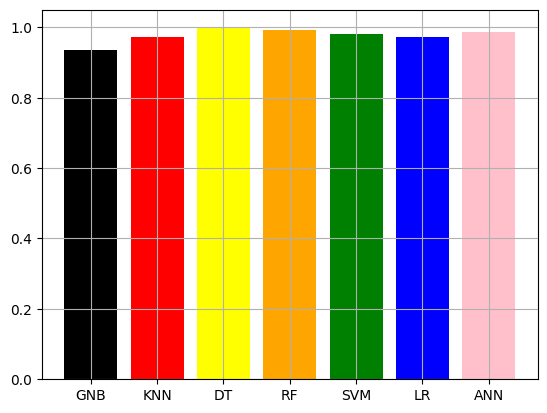

In [39]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

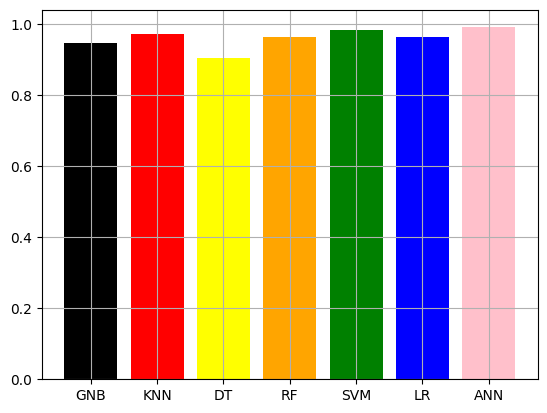

In [40]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

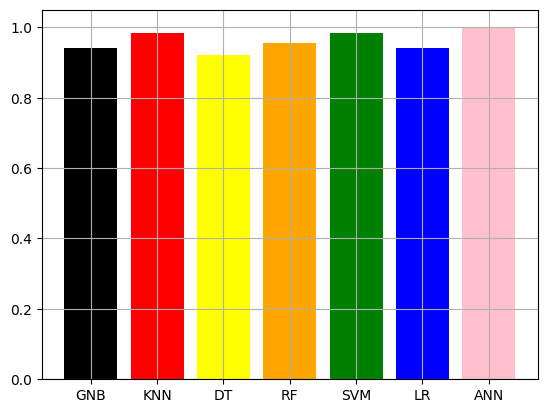

In [41]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

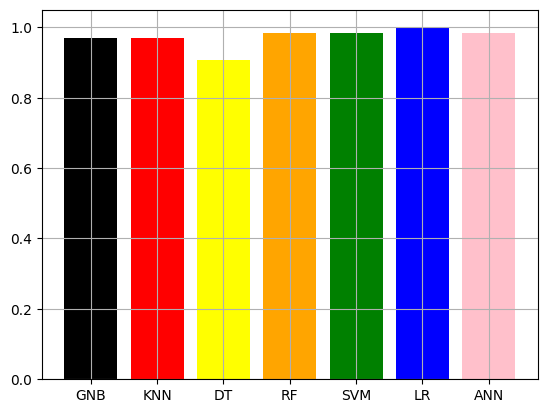

In [42]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["black", "red", "yellow", "orange", "green", "blue", "pink"]
plt.bar(title, r, color=colors)
plt.grid()
plt.show()